# SMEFiT Tutorial

To run this notebook remotely in Google Colab, click the button below 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/LHCfitNikhef/smefit_release/blob/tutorial/tutorial/tutorial.ipynb)

### What is SMEFiT? 
SMEFiT is a Python package for global analyses of particle physics data in the framework of the Standard Model Effective Field Theory (SMEFT). The SMEFT represents a powerful model-independent framework to constrain, identify, and parametrize potential deviations with respect to the predictions of the Standard Model (SM). A particularly attractive feature of the SMEFT is its capability to systematically correlate deviations from the SM between different processes. The full exploitation of the SMEFT potential for indirect New Physics searches from precision measurements requires combining the information provided by the broadest possible dataset, namely carrying out extensive global analysis which is the main purpose of SMEFiT.

In case you would like a recap on the basic ideas underlying the SMEFT, see https://lhcfitnikhef.github.io/smefit_release/theory/SMEFT.html

### Exercise  0 - Installing SMEFiT

Let us install SMEFiT now and import some external dependencies

In [1]:
!pip install smefit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 kB 4.0 MB/s eta 0:00:00
  Using cached ultranest-3.6.4-cp310-cp310-macosx_10_9_x86_64.whl
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 14.7 MB/s eta 0:00:0000:0100:01
  Using cached PyYAML-6.0.1-cp310-cp310-macosx_10_9_x86_64.whl (189 kB)
  Using cached smefit-0.0.1-py3-none-any.whl (115 kB)
  Using cached ultranest-3.6.5.tar.gz (2.6 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.8/260.8 kB 7.3 MB/s eta 0:00:00
  Using cached Cython-3.0.10-cp310-cp310-macosx_10_9_x86_64.whl (3.1 MB)
  Using cached corner-2.2.2-py3-none-any.whl (15 kB)
  Created wheel for ultranest: filename=ultranest-3.6.5-cp310-cp310-macosx_10_9_x86_64.whl size=475649 sha256=4f13c882feef51328ace0a7ec6135d2bce4baa22d85196f065551d31e8e7aa89
  Stored in directory: /Users/j

In [1]:
#!pip install wget
import sys
import os
import wget
import subprocess
import pathlib
import yaml
from IPython.display import Image
#print("Python version:", sys.version)

In [2]:
import smefit
import smefit.runner
from smefit.analyze import run_report
from smefit.analyze.report import Report

smefit.log.setup_console(None)

Download the smefit datasets and runcards

In [ ]:
def file_downloader(url, download_dir='./downloads'):

    if not os.path.exists(download_dir):
        os.mkdir(download_dir)

    file = wget.download(url, out=download_dir)
    return file

smefit_database = file_downloader('https://github.com/LHCfitNikhef/smefit_database/archive/refs/heads/main.zip')
runcard_fit = file_downloader('https://raw.githubusercontent.com/LHCfitNikhef/smefit_release/tutorial/tutorial/runcard_fit.yaml')
runcard_report = file_downloader('htps://raw.githubusercontent.com/LHCfitNikhef/smefit_release/tutorial/tutorial/runcard_report.yaml')

subprocess.run([f"unzip {smefit_database} -d ./downloads"], capture_output=False, shell=True, text=False)

### Exercise 1 - Our first fit

We will study the impact of multiple measurements on the 2-dim parameter space of the following operators

$$
\begin{align}
\mathcal{O}_{Qq}^{1,8} &= \left(\bar{Q}_i\gamma^\mu T^A Q\right)\left(\bar{t}\gamma_\mu T^A t\right) \\
\mathcal{O}_{tq}^8 &= \left(\bar{q}_i\gamma^\mu T^A q_i\right)\left(\bar{t}\gamma_\mu T^A t\right)
\end{align}
$$

The operator $\mathcal{O}_{Qq}^{1,8}$ describes left-handed tops, while $\mathcal{O}_{tq}^8$ describes right-handed tops. The corresponding Wilson coefficients can be constrained from the so-called $t\bar{t}$-charge assymmetries $A_C$ that measures the imbalance of top pairs produced in either the forward or backward regions. Let us first perform the fit, and then comment on the results.

In [7]:
runner_exc_1 = smefit.runner.Runner.from_file(pathlib.Path("./downloads/runcard_asy.yaml"))
runner_exc_1.global_analysis("A")

[23:13:16] WARNING  results/asy already found, overwriting old results                                 ]8;id=330020;file:///Users/jaco/Documents/smefit_release/src/smefit/runner.py\runner.py]8;;\:]8;id=33889;file:///Users/jaco/Documents/smefit_release/src/smefit/runner.py#70\70]8;;\

           INFO     Loading dataset : ATLAS_ttW_13TeV                                                 ]8;id=42485;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=590089;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_ttW_13TeV_2016                                            ]8;id=951204;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=382041;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_ttW_8TeV                                                  ]8;id=221997;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=561025;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_ttZ_13TeV                                                 ]8;id=61738;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=773877;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_ttZ_13TeV_2016                                            ]8;id=805464;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=79626;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_ttZ_13TeV_pTZ                                             ]8;id=911527;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=51938;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_ttZ_8TeV                                                  ]8;id=88372;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=354756;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_ttW_13TeV                                                   ]8;id=395076;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=596113;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_ttW_8TeV                                                    ]8;id=643701;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=717311;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_ttZ_13TeV                                                   ]8;id=873666;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=189441;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_ttZ_13TeV_pTZ                                               ]8;id=105281;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=38390;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_ttZ_8TeV                                                    ]8;id=362025;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=776835;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

/Users/jaco/Documents/smefit_release/src/smefit/coefficients.py:216: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.0 0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  self._table.iloc[self.is_free, 0] = value


           INFO     Computing Analytic solution ...                                                 ]8;id=236817;file:///Users/jaco/Documents/smefit_release/src/smefit/optimize/analytic.py\analytic.py]8;;\:]8;id=273105;file:///Users/jaco/Documents/smefit_release/src/smefit/optimize/analytic.py#127\127]8;;\

┏━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Parameter ┃ Best value ┃ Error ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ O81qq     │ -1.548     │ 1.403 │
│ O83qq     │ -6.073     │ 4.271 │
└───────────┴────────────┴───────┘

           INFO     Sampling solutions ...                                                          ]8;id=295750;file:///Users/jaco/Documents/smefit_release/src/smefit/optimize/analytic.py\analytic.py]8;;\:]8;id=205555;file:///Users/jaco/Documents/smefit_release/src/smefit/optimize/analytic.py#156\156]8;;\

The fit has finished, the results can be analysed by making a fit report:

In [8]:
def make_report(runcard_report):

    with open(runcard_report, encoding="utf-8") as f:
        report_config = yaml.safe_load(f)
    
    report_name = report_config["name"]
    report_path = pathlib.Path(report_config["report_path"]).absolute()
    report_folder = report_path.joinpath(f"{report_name}")

    report_folder.mkdir(exist_ok=True, parents=True)

    report = Report(report_path, report_config["result_path"], report_config)
    
    report.coefficients(**report_config["coefficients_plots"])

[23:13:26] INFO     Loading dataset : ATLAS_ttW_13TeV                                                 ]8;id=451742;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=76957;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_ttW_13TeV_2016                                            ]8;id=573736;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=678781;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_ttW_8TeV                                                  ]8;id=296881;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=823641;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_ttZ_13TeV                                                 ]8;id=751385;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=385030;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_ttZ_13TeV_2016                                            ]8;id=175962;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=681467;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_ttZ_13TeV_pTZ                                             ]8;id=226943;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=306577;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_ttZ_8TeV                                                  ]8;id=246184;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=983644;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_ttW_13TeV                                                   ]8;id=553786;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=10523;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_ttW_8TeV                                                    ]8;id=661719;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=96124;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_ttZ_13TeV                                                   ]8;id=916529;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=133769;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_ttZ_13TeV_pTZ                                               ]8;id=424687;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=533365;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_ttZ_8TeV                                                    ]8;id=741872;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=985467;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Plotting : Posterior histograms                                                   ]8;id=251472;file:///Users/jaco/Documents/smefit_release/src/smefit/analyze/report.py\report.py]8;;\:]8;id=580830;file:///Users/jaco/Documents/smefit_release/src/smefit/analyze/report.py#323\323]8;;\

[23:13:27] INFO     Plotting : 2D confidence level projections                                        ]8;id=587444;file:///Users/jaco/Documents/smefit_release/src/smefit/analyze/report.py\report.py]8;;\:]8;id=876196;file:///Users/jaco/Documents/smefit_release/src/smefit/analyze/report.py#344\344]8;;\

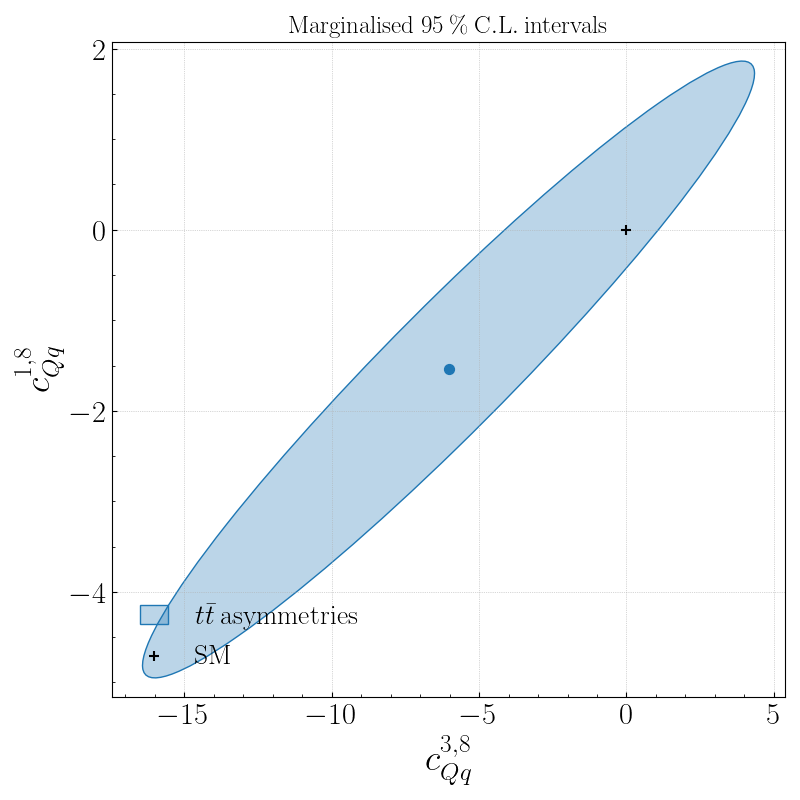

In [9]:
make_report("./downloads/runcard_report_asy.yaml")

# show the exclusion contour
Image(filename='./reports/report_asy/contours_2d.png') 

**Questions**

- What special behaviour do you observe between the two operators?
- What options do we have to further constrain this 2-dim parameters space? Name at least three.

### Exercise 2 A - Adding more measurements

The two operators from exercise 1 modify more than just the charge asymmetries $A_C$. Here we add more measurements, in particular top procecesses for which $A_C = 0$.

In [10]:
runner_exc_2a = smefit.runner.Runner.from_file(pathlib.Path("./downloads/runcard_sym.yaml"))
runner_exc_2a.global_analysis("A")

[23:13:39] WARNING  results/sym already found, overwriting old results                                 ]8;id=418016;file:///Users/jaco/Documents/smefit_release/src/smefit/runner.py\runner.py]8;;\:]8;id=822502;file:///Users/jaco/Documents/smefit_release/src/smefit/runner.py#70\70]8;;\

           INFO     Loading dataset : ATLAS_tt_13TeV_ljets_2016_Mtt                                   ]8;id=323080;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=851423;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_tt_8TeV_dilep_Mtt                                         ]8;id=219740;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=920246;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_tt_8TeV_ljets_Mtt                                         ]8;id=733174;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=559919;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_tt_13TeV_Mtt                                                ]8;id=673379;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=842968;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_tt_13TeV_dilep_2015_Mtt                                     ]8;id=871339;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=634922;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_tt_13TeV_dilep_2016_Mtt                                     ]8;id=609775;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=649926;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_tt_13TeV_ljets_2015_Mtt                                     ]8;id=142108;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=222320;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_tt_13TeV_ljets_2016_Mtt                                     ]8;id=840953;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=785250;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

/Users/jaco/Documents/smefit_release/src/smefit/coefficients.py:216: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.0 0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  self._table.iloc[self.is_free, 0] = value


           INFO     Computing Analytic solution ...                                                 ]8;id=577538;file:///Users/jaco/Documents/smefit_release/src/smefit/optimize/analytic.py\analytic.py]8;;\:]8;id=291059;file:///Users/jaco/Documents/smefit_release/src/smefit/optimize/analytic.py#127\127]8;;\

┏━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Parameter ┃ Best value ┃ Error ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ O81qq     │ -0.209     │ 0.332 │
│ O83qq     │ -3.357     │ 1.882 │
└───────────┴────────────┴───────┘

           INFO     Sampling solutions ...                                                          ]8;id=984222;file:///Users/jaco/Documents/smefit_release/src/smefit/optimize/analytic.py\analytic.py]8;;\:]8;id=394338;file:///Users/jaco/Documents/smefit_release/src/smefit/optimize/analytic.py#156\156]8;;\

The report can be produced again with

[23:13:43] INFO     Loading dataset : ATLAS_tt_13TeV_ljets_2016_Mtt                                   ]8;id=977018;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=28943;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_tt_8TeV_dilep_Mtt                                         ]8;id=705140;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=38634;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_tt_8TeV_ljets_Mtt                                         ]8;id=463258;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=495416;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_tt_13TeV_Mtt                                                ]8;id=297437;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=253679;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_tt_13TeV_dilep_2015_Mtt                                     ]8;id=773483;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=900697;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_tt_13TeV_dilep_2016_Mtt                                     ]8;id=893727;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=204916;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_tt_13TeV_ljets_2015_Mtt                                     ]8;id=533858;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=526296;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_tt_13TeV_ljets_2016_Mtt                                     ]8;id=41163;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=304564;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Plotting : Posterior histograms                                                   ]8;id=999931;file:///Users/jaco/Documents/smefit_release/src/smefit/analyze/report.py\report.py]8;;\:]8;id=53524;file:///Users/jaco/Documents/smefit_release/src/smefit/analyze/report.py#323\323]8;;\

[23:13:44] INFO     Plotting : 2D confidence level projections                                        ]8;id=16688;file:///Users/jaco/Documents/smefit_release/src/smefit/analyze/report.py\report.py]8;;\:]8;id=47819;file:///Users/jaco/Documents/smefit_release/src/smefit/analyze/report.py#344\344]8;;\

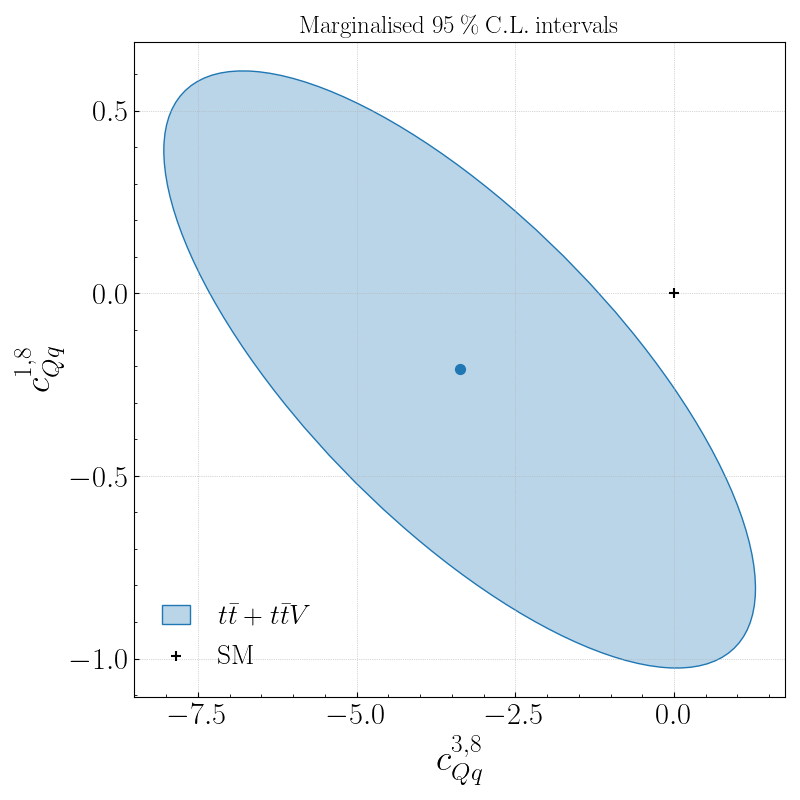

In [11]:
make_report("./downloads/runcard_report_sym.yaml")

# show the exclusion contour
Image(filename='./reports/report_sym/contours_2d.png') 

**Questions**

- Can we exclude the SM this time?
- What special behaviour do you observe between the two operators and how does this compare to exercise 1?

### Exercise 2 B - combined fit

The same operators can modify multiple datasets, and we have no a priori reason to include one over the other. We must include them all! Here we carry out such a combined fit where we add the measurements from exercise 1 and 2a.

In [12]:
runner_higgs = smefit.runner.Runner.from_file(pathlib.Path("./downloads/runcard_combined.yaml"))
runner_higgs.global_analysis("A")

[23:13:51] WARNING  results/combined already found, overwriting old results                            ]8;id=377417;file:///Users/jaco/Documents/smefit_release/src/smefit/runner.py\runner.py]8;;\:]8;id=156452;file:///Users/jaco/Documents/smefit_release/src/smefit/runner.py#70\70]8;;\

           INFO     Loading dataset : ATLAS_ttW_13TeV                                                 ]8;id=288524;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=294418;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_ttW_13TeV_2016                                            ]8;id=180838;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=705481;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_ttW_8TeV                                                  ]8;id=783545;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=415066;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_ttZ_13TeV                                                 ]8;id=983340;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=300457;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_ttZ_13TeV_2016                                            ]8;id=697466;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=477762;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_ttZ_13TeV_pTZ                                             ]8;id=88905;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=621984;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_ttZ_8TeV                                                  ]8;id=188455;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=8562;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_tt_13TeV_ljets_2016_Mtt                                   ]8;id=836738;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=817296;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_tt_8TeV_dilep_Mtt                                         ]8;id=335702;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=298615;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_tt_8TeV_ljets_Mtt                                         ]8;id=628069;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=791940;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_ttW_13TeV                                                   ]8;id=103327;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=888937;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_ttW_8TeV                                                    ]8;id=402864;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=6559;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_ttZ_13TeV                                                   ]8;id=347851;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=525515;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_ttZ_13TeV_pTZ                                               ]8;id=996210;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=358008;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_ttZ_8TeV                                                    ]8;id=349736;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=296260;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_tt_13TeV_Mtt                                                ]8;id=704976;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=797308;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_tt_13TeV_dilep_2015_Mtt                                     ]8;id=813562;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=351946;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_tt_13TeV_dilep_2016_Mtt                                     ]8;id=581943;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=643931;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_tt_13TeV_ljets_2015_Mtt                                     ]8;id=217634;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=565539;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_tt_13TeV_ljets_2016_Mtt                                     ]8;id=902844;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=760916;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

/Users/jaco/Documents/smefit_release/src/smefit/coefficients.py:216: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.0 0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  self._table.iloc[self.is_free, 0] = value


           INFO     Computing Analytic solution ...                                                 ]8;id=354936;file:///Users/jaco/Documents/smefit_release/src/smefit/optimize/analytic.py\analytic.py]8;;\:]8;id=442879;file:///Users/jaco/Documents/smefit_release/src/smefit/optimize/analytic.py#127\127]8;;\

┏━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Parameter ┃ Best value ┃ Error ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ O81qq     │ -0.342     │ 0.199 │
│ O83qq     │ -2.672     │ 0.886 │
└───────────┴────────────┴───────┘

           INFO     Sampling solutions ...                                                          ]8;id=82557;file:///Users/jaco/Documents/smefit_release/src/smefit/optimize/analytic.py\analytic.py]8;;\:]8;id=4082;file:///Users/jaco/Documents/smefit_release/src/smefit/optimize/analytic.py#156\156]8;;\

In [13]:
make_report("./downloads/runcard_report_combined.yaml")

[23:13:54] INFO     Loading dataset : ATLAS_tt_13TeV_ljets_2016_Mtt                                   ]8;id=997113;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=820128;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_tt_8TeV_dilep_Mtt                                         ]8;id=600545;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=308224;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_tt_8TeV_ljets_Mtt                                         ]8;id=902963;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=295431;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_tt_13TeV_Mtt                                                ]8;id=740117;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=595161;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_tt_13TeV_dilep_2015_Mtt                                     ]8;id=912908;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=110888;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_tt_13TeV_dilep_2016_Mtt                                     ]8;id=24497;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=368709;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_tt_13TeV_ljets_2015_Mtt                                     ]8;id=609122;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=376874;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_tt_13TeV_ljets_2016_Mtt                                     ]8;id=850161;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=814218;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_ttW_13TeV                                                 ]8;id=459213;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=415889;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_ttW_13TeV_2016                                            ]8;id=541359;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=143909;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_ttW_8TeV                                                  ]8;id=450783;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=554861;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_ttZ_13TeV                                                 ]8;id=157093;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=524211;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_ttZ_13TeV_2016                                            ]8;id=940455;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=104779;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_ttZ_13TeV_pTZ                                             ]8;id=97342;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=684491;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_ttZ_8TeV                                                  ]8;id=953064;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=433676;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_ttW_13TeV                                                   ]8;id=90264;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=691055;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_ttW_8TeV                                                    ]8;id=473196;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=843016;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_ttZ_13TeV                                                   ]8;id=153061;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=759405;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_ttZ_13TeV_pTZ                                               ]8;id=383544;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=180178;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_ttZ_8TeV                                                    ]8;id=873024;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=37458;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_ttW_13TeV                                                 ]8;id=878481;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=677351;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_ttW_13TeV_2016                                            ]8;id=634827;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=972452;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_ttW_8TeV                                                  ]8;id=639692;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=524699;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_ttZ_13TeV                                                 ]8;id=859367;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=343594;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_ttZ_13TeV_2016                                            ]8;id=795768;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=302324;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_ttZ_13TeV_pTZ                                             ]8;id=812462;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=265232;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_ttZ_8TeV                                                  ]8;id=955311;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=987176;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_tt_13TeV_ljets_2016_Mtt                                   ]8;id=120376;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=867964;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_tt_8TeV_dilep_Mtt                                         ]8;id=571493;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=737985;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : ATLAS_tt_8TeV_ljets_Mtt                                         ]8;id=976201;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=589758;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_ttW_13TeV                                                   ]8;id=31825;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=272523;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_ttW_8TeV                                                    ]8;id=218298;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=303009;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_ttZ_13TeV                                                   ]8;id=21431;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=521021;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_ttZ_13TeV_pTZ                                               ]8;id=875415;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=161847;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_ttZ_8TeV                                                    ]8;id=86705;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=767682;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_tt_13TeV_Mtt                                                ]8;id=124111;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=416793;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_tt_13TeV_dilep_2015_Mtt                                     ]8;id=736341;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=718452;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_tt_13TeV_dilep_2016_Mtt                                     ]8;id=791944;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=56067;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_tt_13TeV_ljets_2015_Mtt                                     ]8;id=118733;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=233354;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

           INFO     Loading dataset : CMS_tt_13TeV_ljets_2016_Mtt                                     ]8;id=200628;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py\loader.py]8;;\:]8;id=875552;file:///Users/jaco/Documents/smefit_release/src/smefit/loader.py#135\135]8;;\

[23:13:55] INFO     Plotting : Posterior histograms                                                   ]8;id=984514;file:///Users/jaco/Documents/smefit_release/src/smefit/analyze/report.py\report.py]8;;\:]8;id=287549;file:///Users/jaco/Documents/smefit_release/src/smefit/analyze/report.py#323\323]8;;\

[23:13:56] INFO     Plotting : 2D confidence level projections                                        ]8;id=491251;file:///Users/jaco/Documents/smefit_release/src/smefit/analyze/report.py\report.py]8;;\:]8;id=849347;file:///Users/jaco/Documents/smefit_release/src/smefit/analyze/report.py#344\344]8;;\

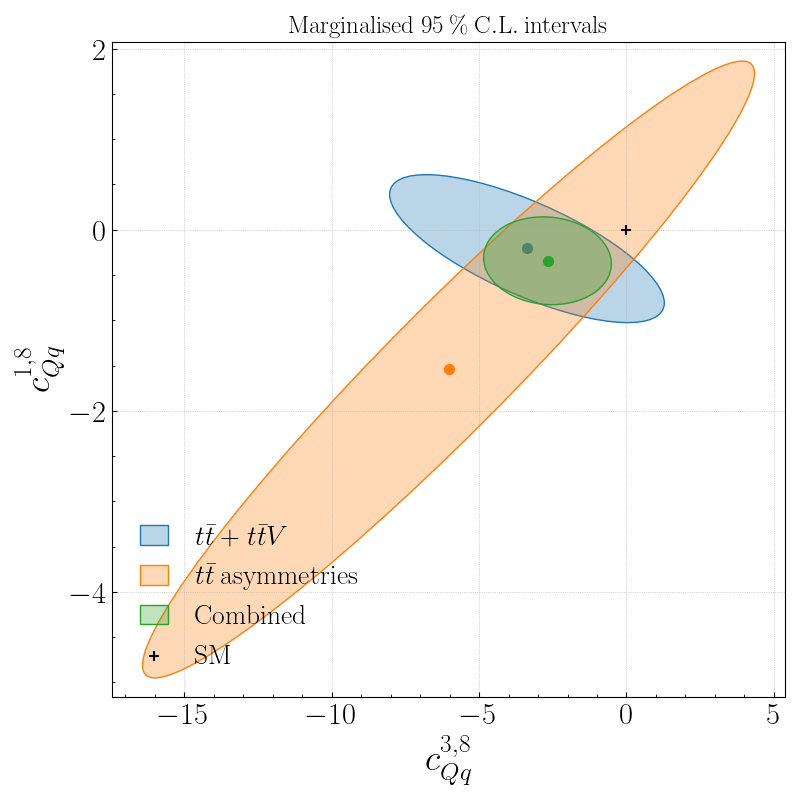

In [14]:
# show the exclusion contour
Image(filename='./reports/report_combined/contours_2d.png') 

**Questions**

- Comment on the interplay between the two classes of measurements
- What lesson do you take from this?

### Exercise 3